In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
# rename the lebel columns from 'NObeyesdad' to 'result'
df = df.rename(columns={'NObeyesdad': 'result'})
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
result                            0
dtype: int64

In [5]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [6]:
data_proflileing(df)

,column,dtype,nunique,null,duplicates
0,Gender,object,2,0,2109
1,Age,float64,1402,0,709
2,Height,float64,1574,0,537
3,Weight,float64,1525,0,586
4,family_history_with_overweight,object,2,0,2109
5,FAVC,object,2,0,2109
6,FCVC,float64,810,0,1301
7,NCP,float64,635,0,1476
8,CAEC,object,4,0,2107
9,SMOKE,object,2,0,2109


## EDA

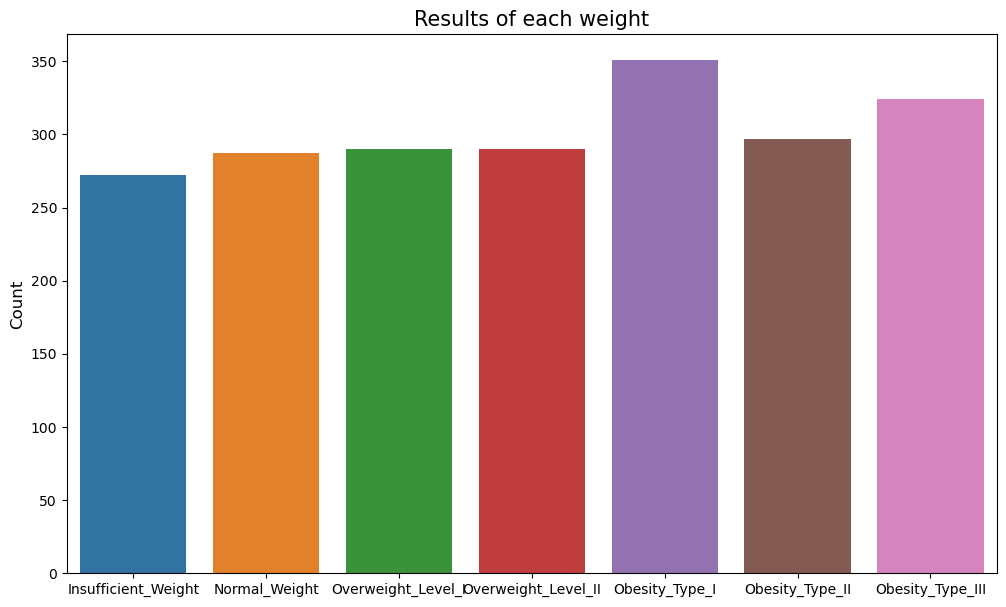

In [7]:
plt.figure(figsize=(12,7))
sns.countplot(x='result',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Results of each weight',fontsize=15)
plt.show()

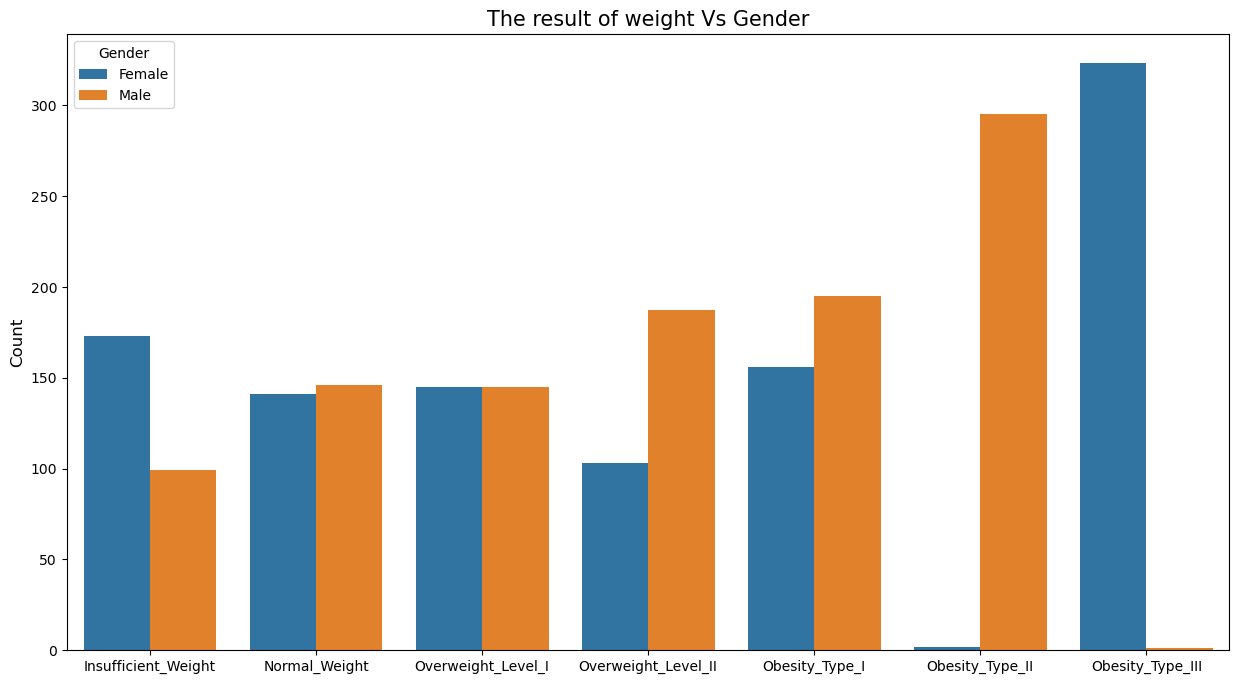

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

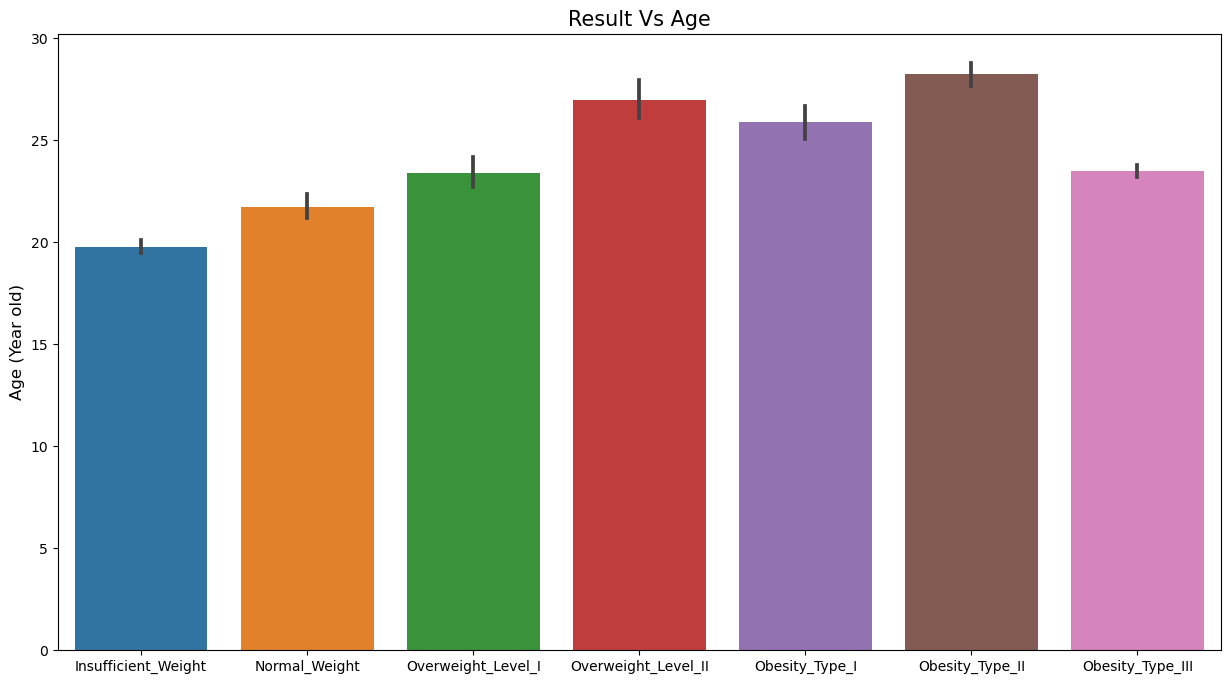

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='Age',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Result Vs Age',fontsize=15)
plt.ylabel('Age (Year old)',fontsize=12)
plt.xlabel(None)
plt.show()

- Insufficient weight are in the young age (19-21)
- The obesity level increasing follow by age except Obesity type II and Obesity type III

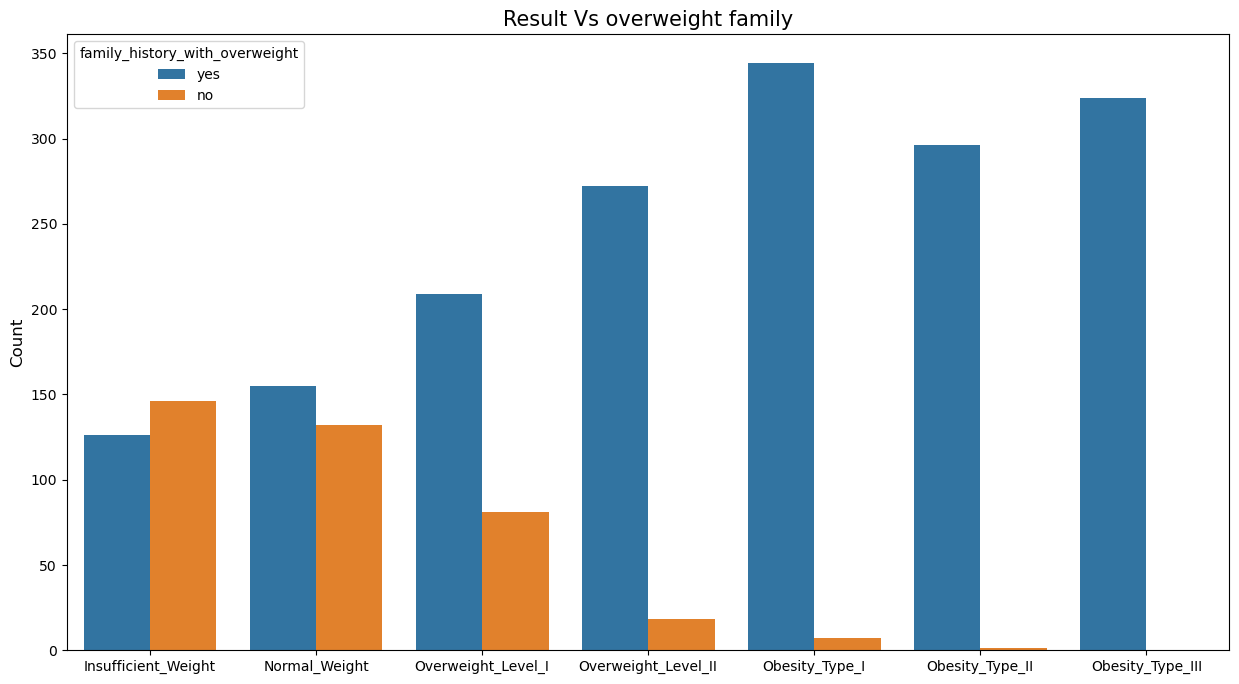

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='family_history_with_overweight',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs overweight family',fontsize=15)
plt.show()


- Obesity in family effected to sample

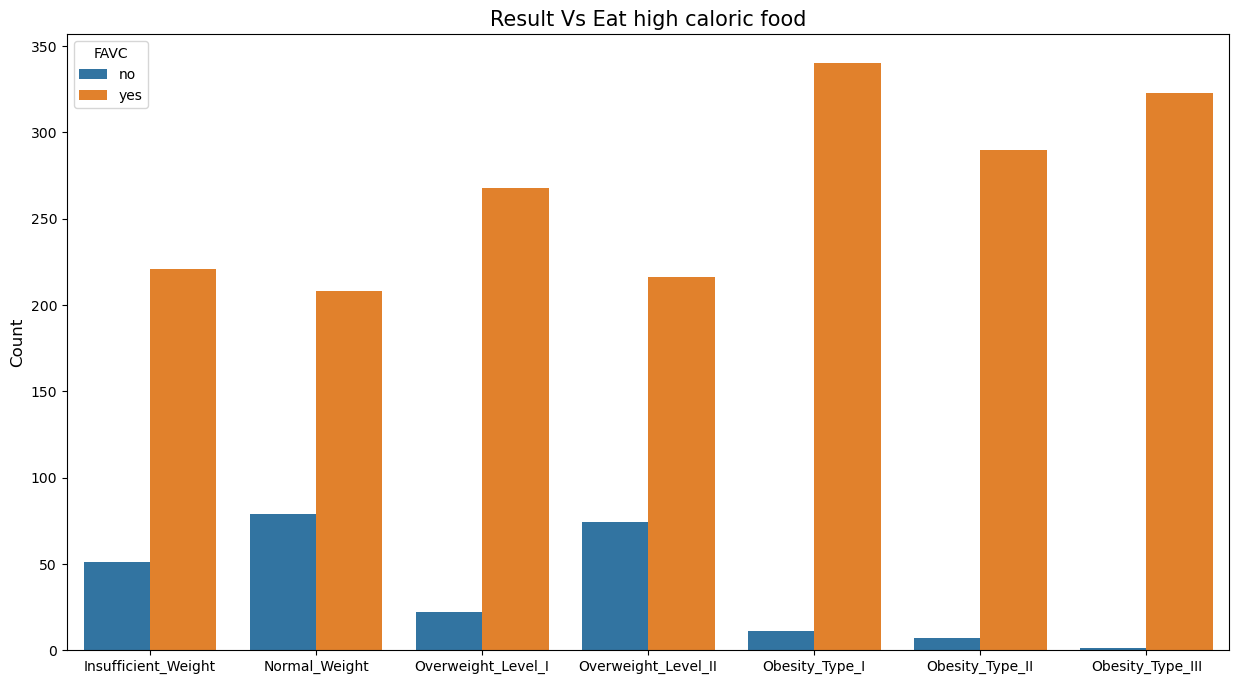

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='FAVC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Eat high caloric food',fontsize=15)
plt.show()

- Eat high caloric food frequenlty effect in all cases

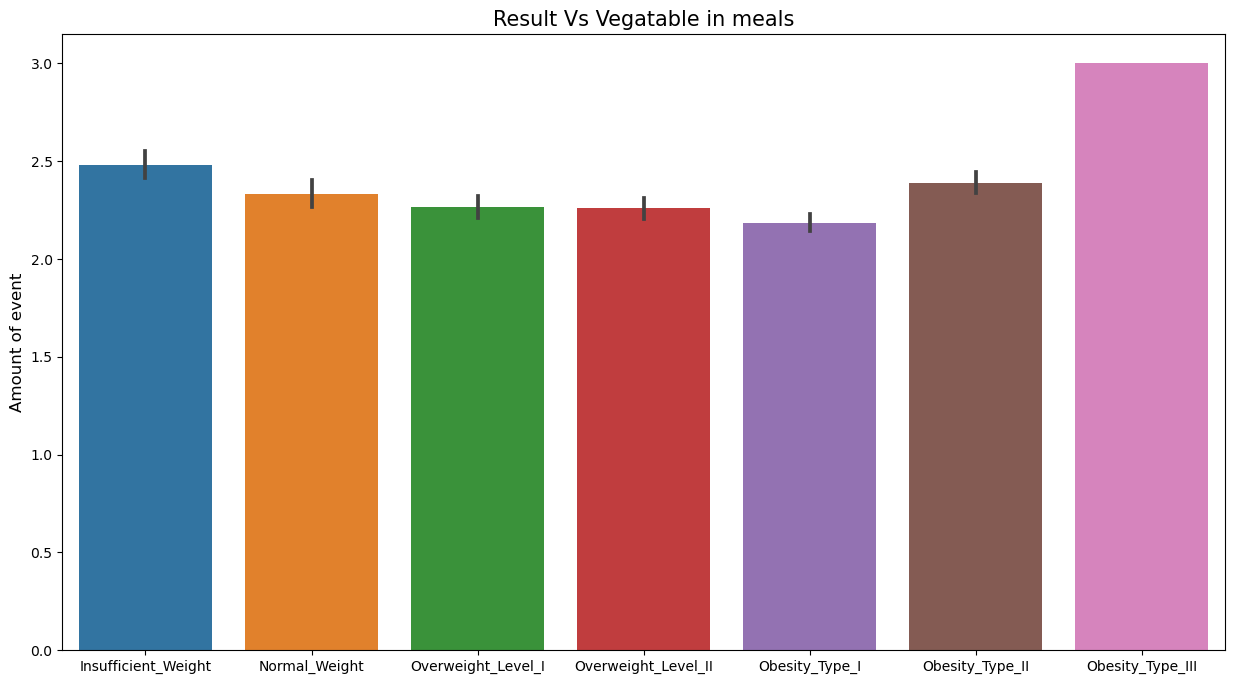

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='FCVC',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of event',fontsize=12)
plt.title('Result Vs Vegatable in meals',fontsize=15)
plt.show()

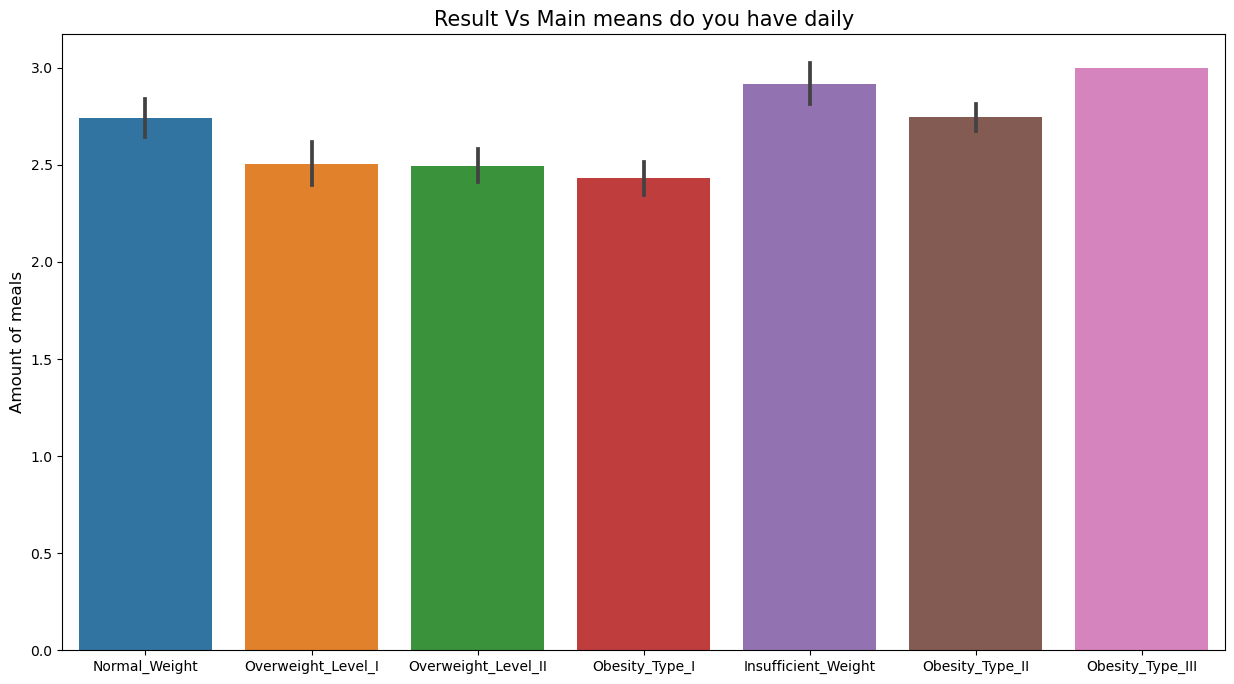

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='NCP',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of meals',fontsize=12)
plt.title('Result Vs Main means do you have daily',fontsize=15)
plt.show()

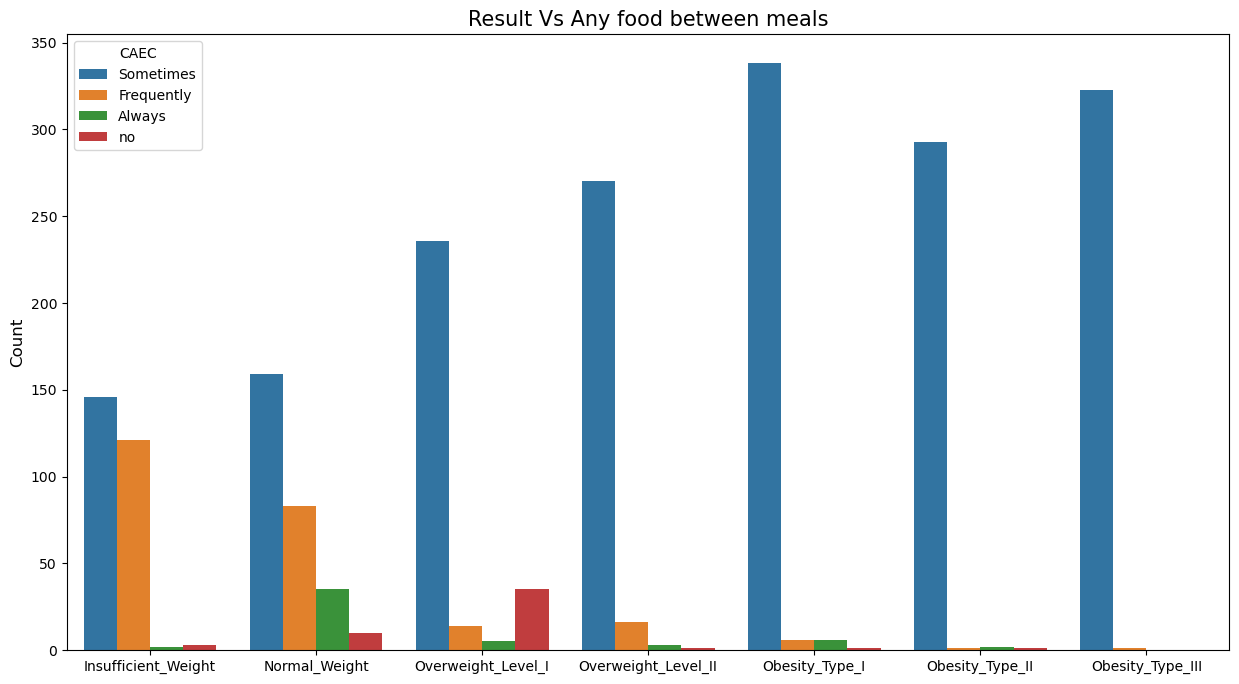

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='CAEC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Any food between meals',fontsize=15)
plt.show()

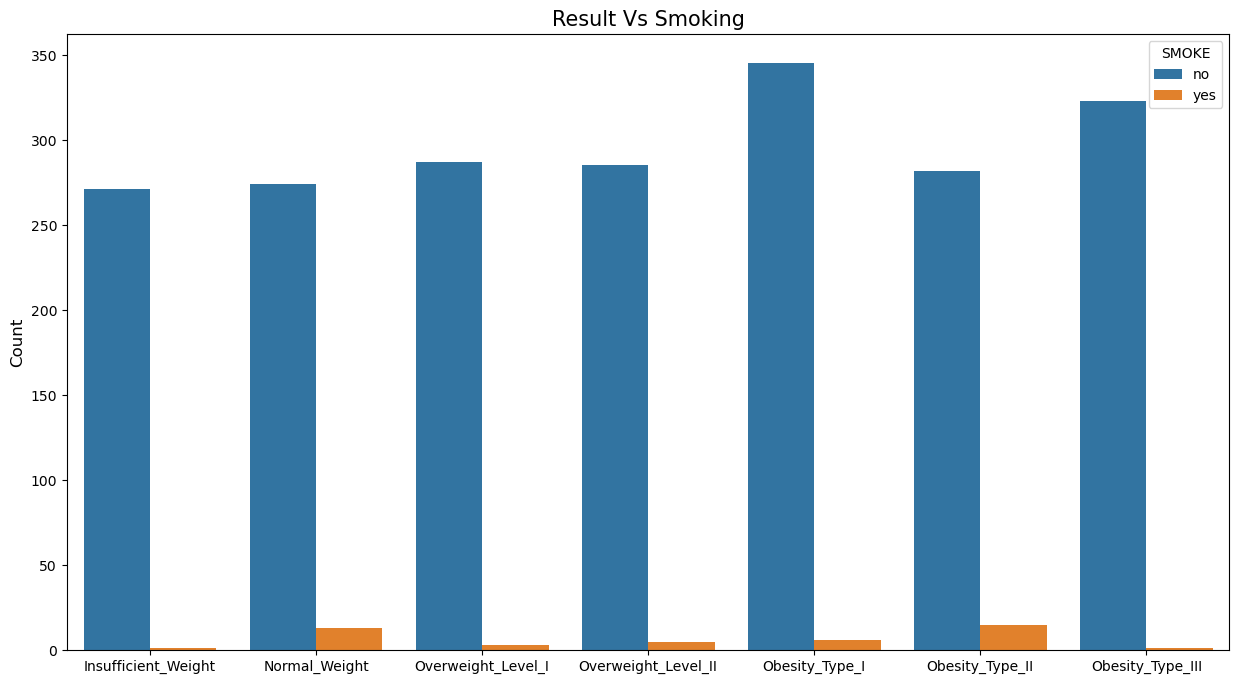

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='SMOKE',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Smoking',fontsize=15)
plt.show()

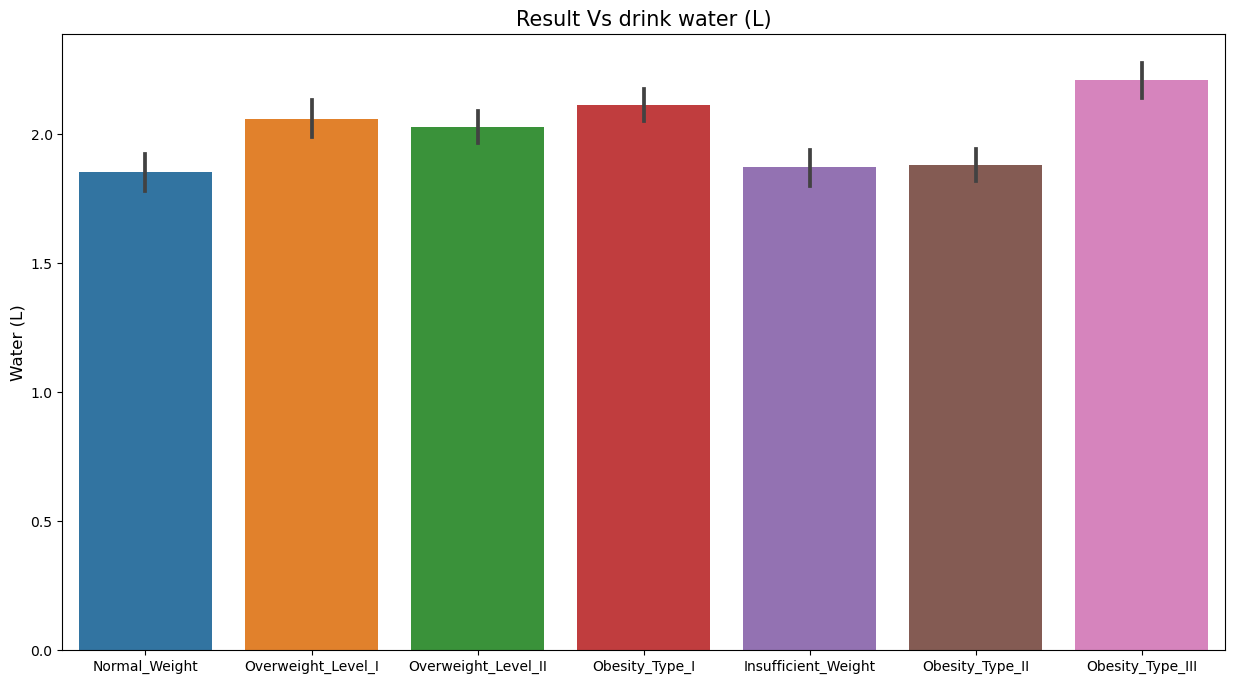

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='CH2O',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Water (L)',fontsize=12)
plt.title('Result Vs drink water (L)',fontsize=15)
plt.show()

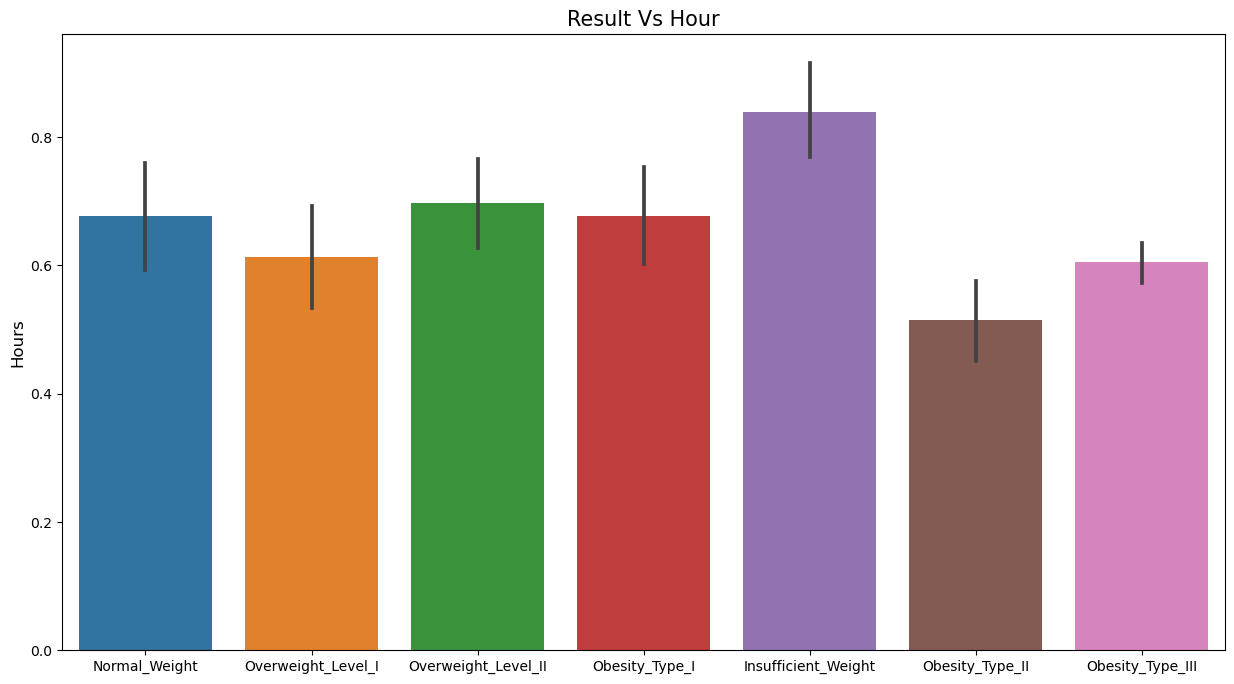

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='TUE',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Hours',fontsize=12)
plt.title('Result Vs Hour',fontsize=15)
plt.show()


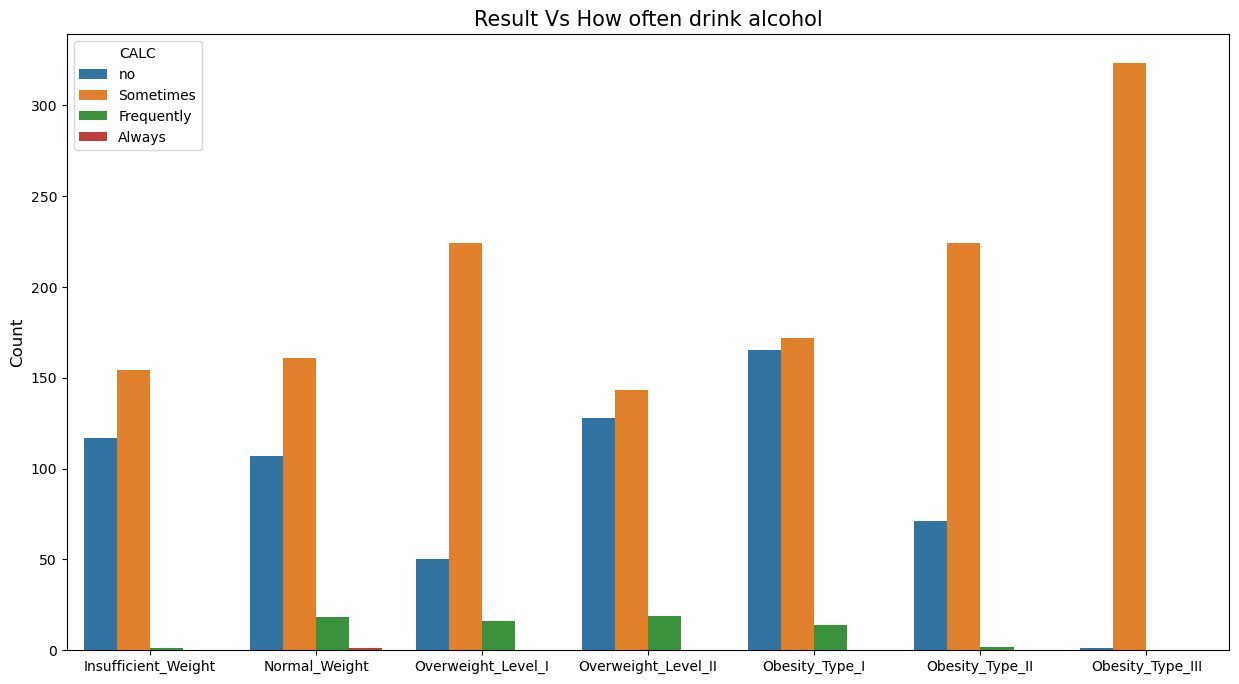

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='CALC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs How often drink alcohol',fontsize=15)
plt.show()

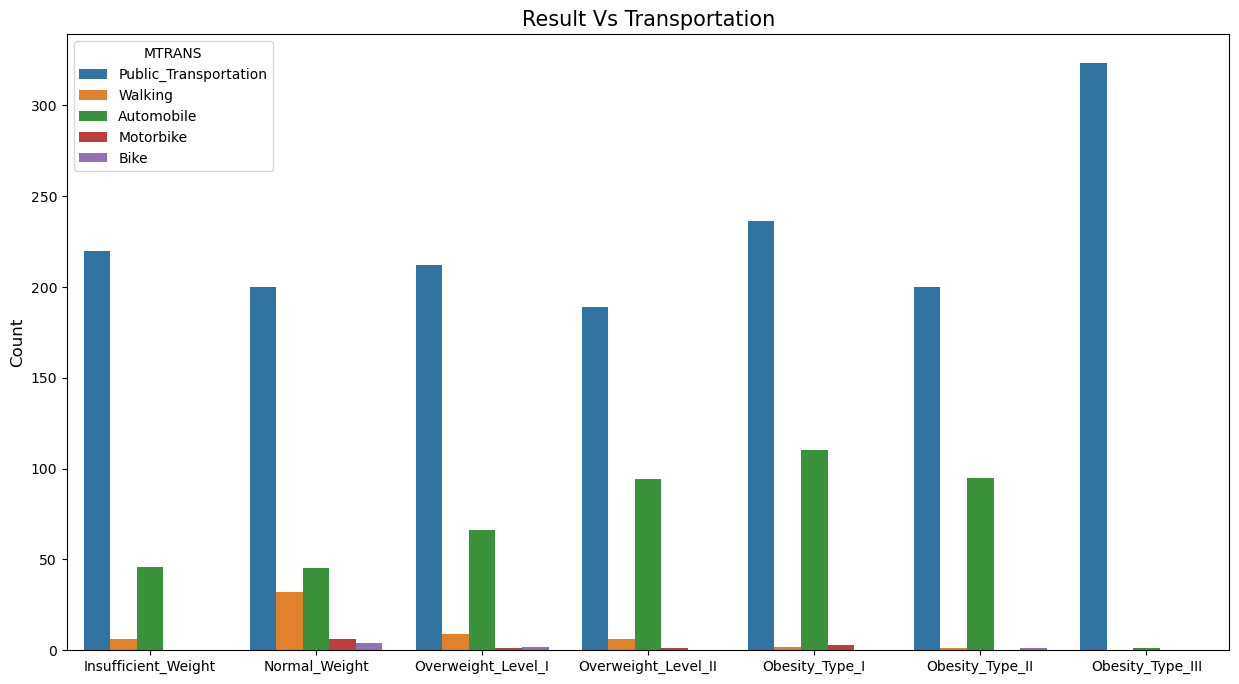

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='MTRANS',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Transportation',fontsize=15)
plt.show()

## Feature Engineering

In [21]:
df= pd.get_dummies(df,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

In [22]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,result,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
X=df.drop('result',axis=1)
y=df['result']

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [29]:
le =LabelEncoder()

In [30]:
le.fit(y)

LabelEncoder()

In [31]:
list(le.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [32]:
y = le.transform(y)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
min_max =MinMaxScaler()

In [35]:
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

## Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


## Decision Tree

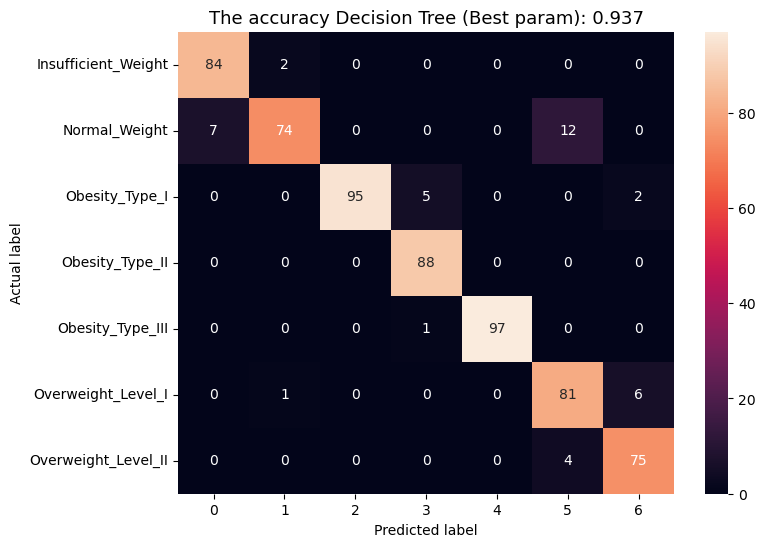

Accuracy score:  0.9369085173501577
Precision score:  0.9369931573007027


In [52]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter='best')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=mapping)

plt.figure(figsize=(8,6))                  
sns.heatmap(cm_df, annot=True)
plt.title('The accuracy Decision Tree (Best param): {0:.3f}'.format(accuracy_score(y_test,y_pred)),fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))

### RandomForestClassifier

In [54]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
y_pred_rf = clf.predict(X_test)
y_prob_rf = clf.predict_proba(X_test)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_df_rf = pd.DataFrame(cm_rf,index=mapping)

print('Accuracy score: ', accuracy_score(y_test,y_pred_rf))
print('Precision score: ',precision_score(y_test,y_pred_rf,average='macro'))

Accuracy score:  0.9369085173501577
Precision score:  0.9369931573007027


### Logistric Regression

In [55]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)
y_pred_lr = clf.predict(X_test)
y_prob_lr = clf.predict_proba(X_test)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_df_lr = pd.DataFrame(cm_lr,index=mapping)

print('Accuracy score: ', accuracy_score(y_test,y_pred_lr))
print('Precision score: ',precision_score(y_test,y_pred_lr,average='macro'))

Accuracy score:  0.9369085173501577
Precision score:  0.9369931573007027
